In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [38]:
with open('data_shaker.csv') as file:
    data_shaker = pd.read_csv(file, delimiter=' ')

with open('data_rascheska.csv') as file:
    data_rascheska = pd.read_csv(file, delimiter=' ')

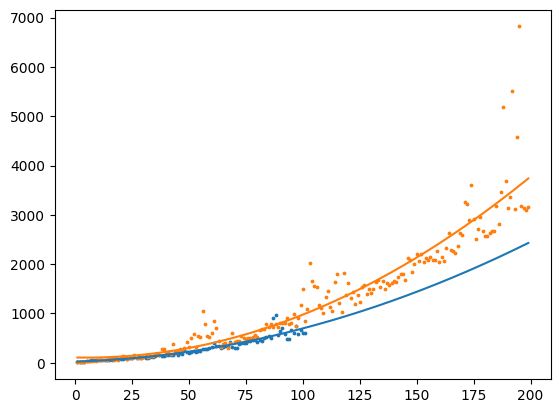

In [39]:
size1 = data_shaker['size']
time1 = data_shaker['time']

size2 = data_rascheska['size']
time2 = data_rascheska['time']

def mapping(x, a, b, c):
    return a * x ** 2 + b * x + c

popt1, _ = curve_fit(mapping, size1, time1)
popt2, _ = curve_fit(mapping, size2, time2)

a1, b1, c1 = popt1
a2, b2, c2 = popt2

x = np.linspace(min(*size1, *size2), max(*size1, *size2), 1000)

plt.scatter(size1, time1, s = 3)
plt.scatter(size2, time2, s = 3)

plt.plot(x, mapping(x, a1, b1, c1))
plt.plot(x, mapping(x, a2, b2, c2))

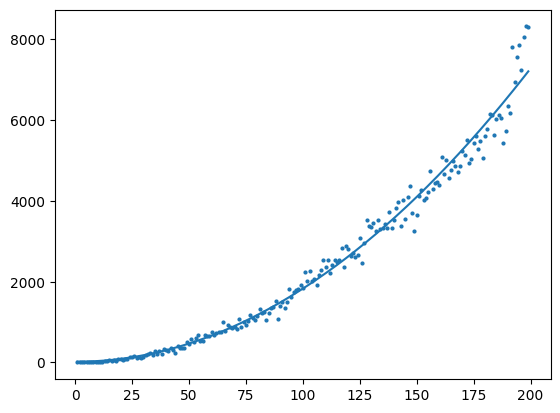

In [43]:
size2 = data_rascheska['size']
perm2 = data_rascheska['perm']

def mapping(x, a, b, c):
    return a * x ** 2 + b * x + c

popt2, _ = curve_fit(mapping, size2, perm2)
a2, b2, c2 = popt2

x = np.linspace(min(*size1, *size2), max(*size1, *size2), 1000)
plt.scatter(size2, perm2, s = 4)
plt.plot(x, mapping(x, a2, b2, c2))

plt.show()

In [41]:
with open('data_shell_geometry.csv') as file:
    data_geometry = pd.read_csv(file, delimiter=' ')
with open('data_shell_habbibi.csv') as file:
    data_habbibi = pd.read_csv(file, delimiter=' ')
with open('data_shell_fibonacchi.csv') as file:
    data_fibo = pd.read_csv(file, delimiter=' ')

geometry:  3.0234317127467487
hibbard:  1.792625778557759
fibonacchi:  1.439472569696136


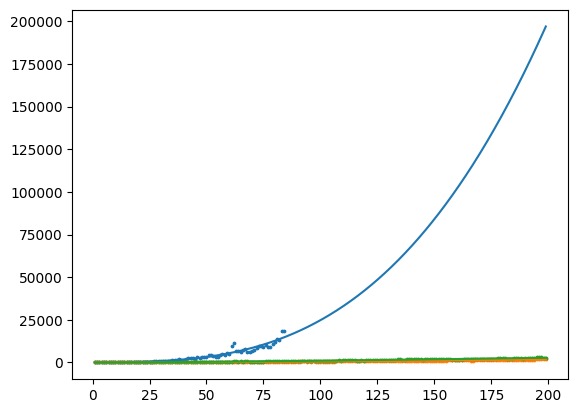

In [45]:
size_geom = data_geometry['size']
time_geom = data_geometry['time']

size_hab = data_habbibi['size']
time_hab = data_habbibi['time']

size_fibo = data_fibo['size']
time_fibo = data_fibo['time']

def mapping1(x, a, p, c):
    return a * x ** p + c

popt_geom, _ = curve_fit(mapping1, size_geom, time_geom)
a_geom, p_geom, c_geom = popt_geom

popt_hab, _ = curve_fit(mapping1, size_hab, time_hab)
a_hab, p_hab, c_hab = popt_hab

popt_fibo, _ = curve_fit(mapping1, size_fibo, time_fibo)
a_fibo, p_fibo, c_fibo = popt_fibo

x = np.linspace(min(*size_geom, *size_hab, *size_fibo), max(*size_geom, *size_hab, *size_fibo), 1000)

plt.scatter(size_geom, time_geom, s = 3)
plt.plot(x, a_geom * x ** p_geom + c_geom)

plt.scatter(size_hab, time_hab, s = 3)
plt.plot(x, a_hab * x ** p_hab + c_hab)

plt.scatter(size_fibo, time_fibo, s = 3)
plt.plot(x, a_fibo * x ** p_fibo + c_fibo)

print("geometry: ", p_geom)
print("hibbard: ", p_hab)
print("fibonacchi: ", p_fibo)